### 1.) About linear regression

Linear regression is a simple machine learning algorithm used to predict a target given a set of variables/features and is based on the following formula:

\begin{equation}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
\end{equation}

Where:
- dependent variable (target):
\begin{equation}y\end{equation}

- independent variables (predictor variables):
\begin{equation}
(x_1, x_2, \dots, x_n)
\end{equation}

- Intercept:
\begin{equation}
\beta_0 
\end{equation}

- Coefficients of the independent variables
\begin{equation}
(\beta_1, \beta_2, \dots, \beta_n)
\end{equation}

- Error (residuum)
\begin{equation}
\epsilon
\end{equation}

PROS:
- typically useful method for time series forecasting
- easy to implement
- output can be interpreted, influence of predictor va
- very high computational speed, can be trained and and used for predictions on basic and affordable hardware in a short amount of time, even on large datasets, no high-performance computing cluster needed

CONS:
- heavily depends on correlationn of y and X, small room to improve(if result is bad, not much can be done)
- results can be strongly influenced by outliers in a negativ way which makes the prediction less accurate and less reliable

### Import //ignore

In [63]:
import pandas as pd
import numpy as np

In [84]:
raw_df = pd.read_csv('/home/user/ai-project/linearRegression/smard_comlpete.gz',compression='gzip')
df=raw_df[raw_df.duplicated(keep=False) == False]

### 2.) Data Preprocessing/Data Cleaning

The Dataset of choice contains many different variables provided by smard.de.
To actualy use the data, a few important steps of preprocessing are needed.

At first, the names of the columns have to be changed to differentiate them. The reason for that lies in the way the data is provided; e.g., <price actual> and <price forecast> are not stored in the same table and have to be downloaded separately but are both initially just named <price>.
Therefore, the actual name is only implied by the download source, and after a merge of the different tables, it would lead to a name collision.
To solve this issue, every column name gets extendet with a explicid prefix.

The next step is to drop the 'Date' values since they are stored in a data format which is not Integer nor Float but the in this report used implementation of linear regression can not work with such a data format.

Another required preprocessing step, which is neede due to the nature of the model implementation, is to deal with "not a number" (short, NaN) values.
The two main ways to do that is to:
    - fill NaN with the integer value 0
    - fill NaN with the mean of the corresponding column
The impact of both methods is compared in <section 3.2>

Dealing with DateTime type values also can be a challenge because e.g. linear regression can not work with the data type out of the box. A workaround for this problem is to encode the different segment like days, hours etc. to integer values each representing one part of the time format.

In [72]:
#df['Start_Date'] = pd.to_datetime(df['Start_Date'])
#df['day_of_month'] = df['Start_Date'].dt.day
#df['hour'] = df['Start_Date'].dt.hour

#df.drop(columns=['Start_Date','End_Date'], inplace=True)

### 3.1) Visualisation of Correlation

An important step in the process of finding the right features to train the model is to examine the correlation between the variables in the given dataset. Since there are many different features, a heatmap-plot is a good way to display them all while still being a practical overview.

To get a more percice feature selection, the python library pandas provides a .corr() function which can be used to get the values satisfiying a chosen condition e.g. getting the ten most correlating values relating to the 'price'.

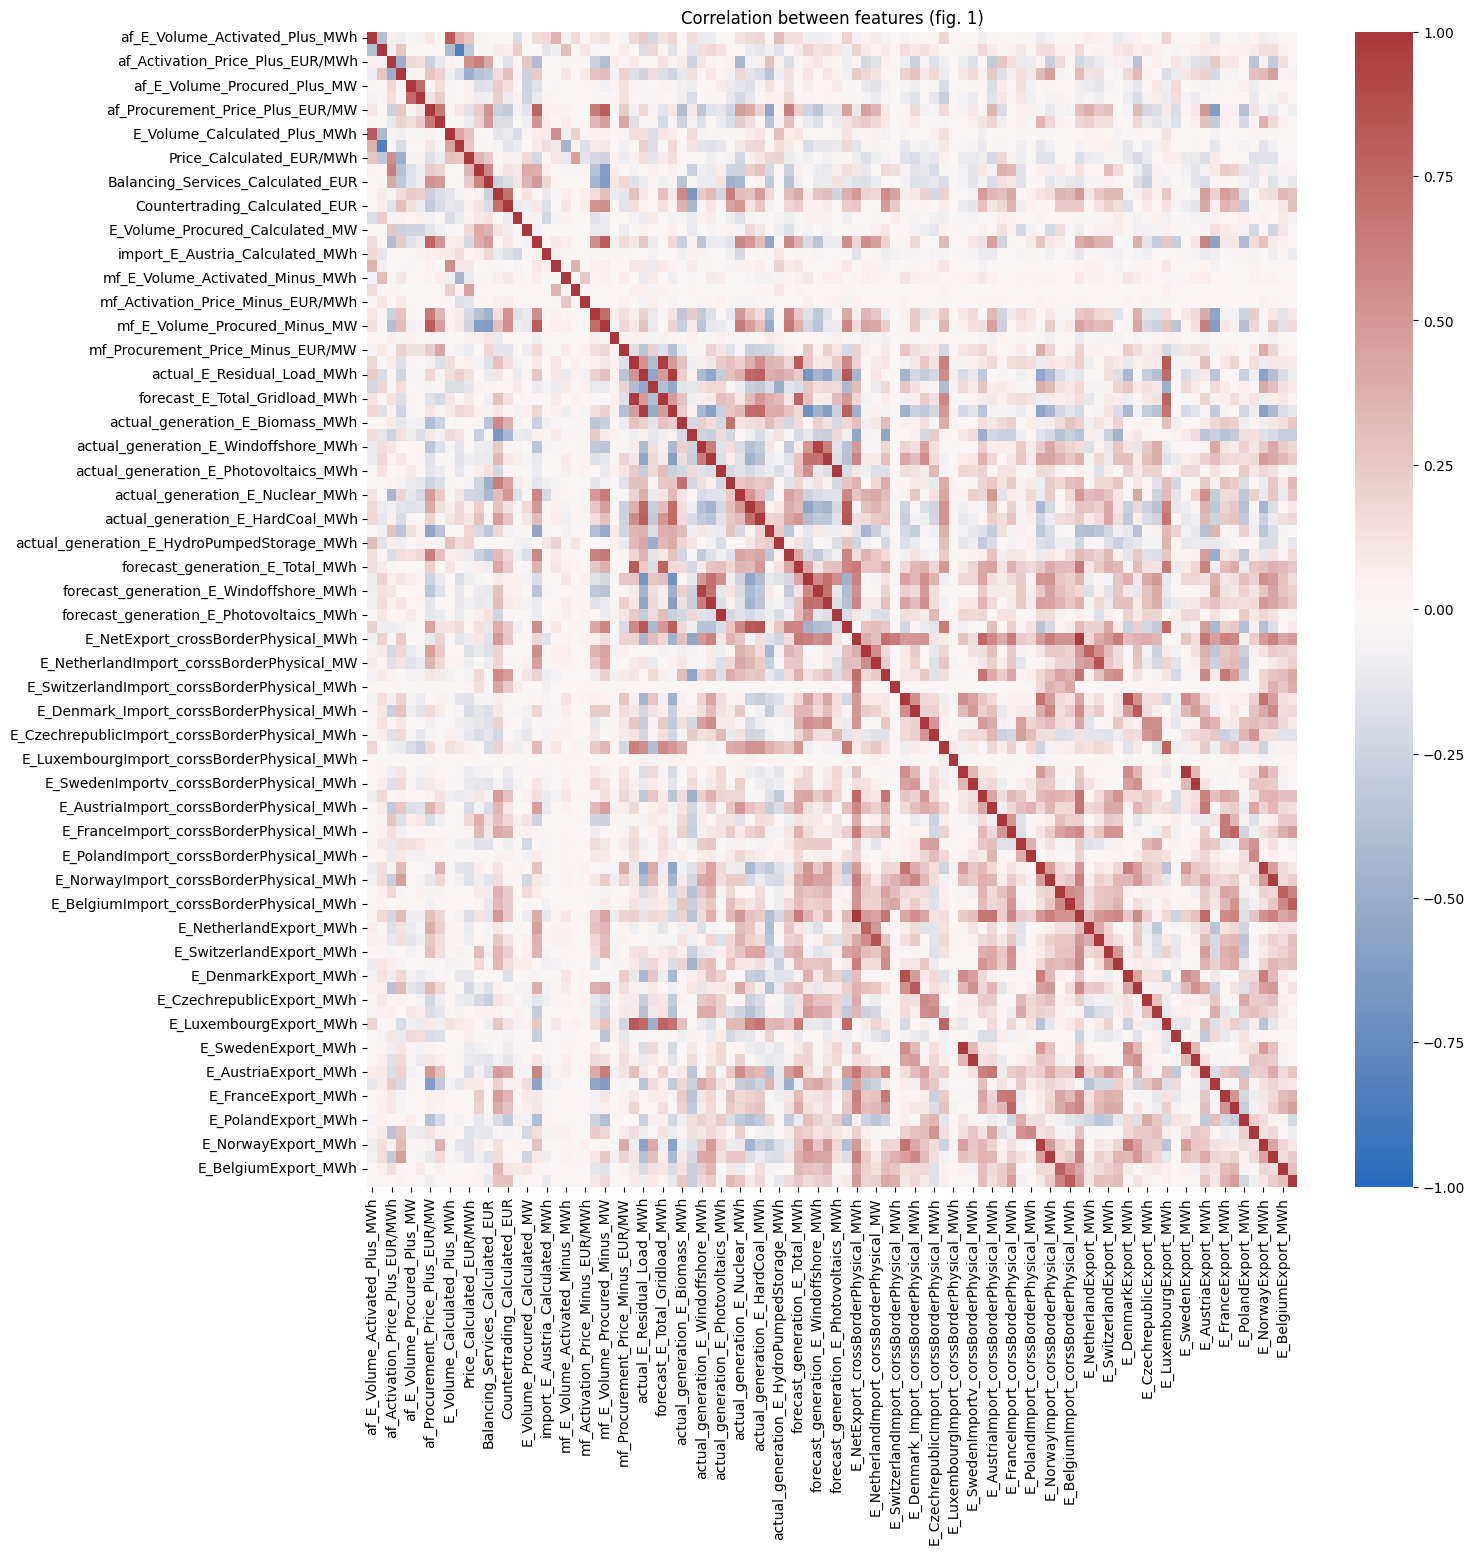

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

#dataslice with fewest NaN entries
df_slice = df[(pd.to_datetime(df['Start_Date'])>=pd.to_datetime('2022-01-31 00:00:00')) & 
(pd.to_datetime(df['End_Date'])<=pd.to_datetime('2022-05-31 00:00:00'))]

df = df.drop(columns=['Start_Date','End_Date'])
df_slice = df_slice.drop(columns=['Start_Date','End_Date'])

#plot Abb. 1
df_corr=df.corr()

plt.figure(figsize=(15, 15))
plt.title("Correlation between features (fig. 1)")
sns.heatmap(df_corr, vmin=-1, vmax=1, center=0, cmap='vlag')
plt.show()

#### 3.2) Comparisson of filling methods

There are many missing entries in the SMARD dataset 

Filling with mean: 

In [88]:
mean_df = df.fillna(df.mean())
mean_df_slice = df_slice.fillna(df_slice.mean())

zero_df = df.apply(lambda col: col.fillna(0), axis=0)
zero_df_slice = df_slice.apply(lambda col: col.fillna(0), axis=0)

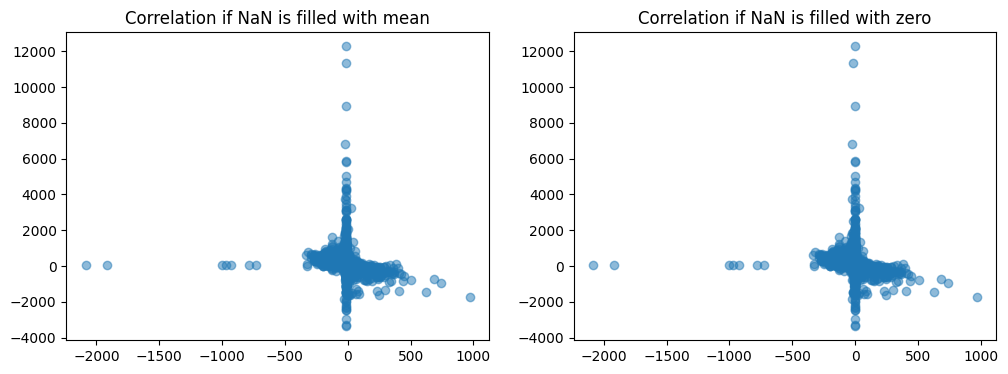

In [92]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))
axes[0].scatter(x = mean_df['af_Activation_Price_Minus_EUR/MWh'],y = mean_df['Price_Calculated_EUR/MWh'], alpha=0.5)
axes[0].set_title("Correlation if NaN is filled with mean")

axes[1].scatter(x = zero_df['af_Activation_Price_Minus_EUR/MWh'],y = zero_df['Price_Calculated_EUR/MWh'], alpha=0.5)
axes[1].set_title("Correlation if NaN is filled with zero")
plt.show()

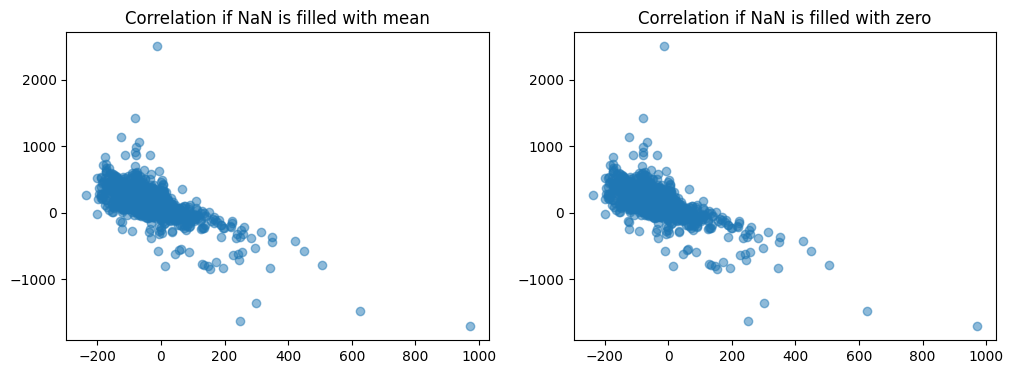

In [91]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))
axes[0].scatter(x = mean_df_slice['af_Activation_Price_Minus_EUR/MWh'],y = mean_df_slice['Price_Calculated_EUR/MWh'], alpha=0.5)
axes[0].set_title("Correlation if NaN is filled with mean")

axes[1].scatter(x = zero_df_slice['af_Activation_Price_Minus_EUR/MWh'],y = zero_df_slice['Price_Calculated_EUR/MWh'], alpha=0.5)
axes[1].set_title("Correlation if NaN is filled with zero")
plt.show()

The results show that the choice between filling with zero or filling with the mean does not impact the results in a sifnificant way. Rather interesting is the difference between the usage of a timeslice containing much less empty values. Therefore the priority should lay on using less but complete data instead of a dataset with big gaps.

In [93]:
#print(mean_df.corr().abs().nlargest(5,'Price_Calculated_EUR/MWh').index)
#print(zero_df.corr().abs().nlargest(5,'Price_Calculated_EUR/MWh').index)

#### 4.) Results and Conclusion

//erklärung

In [3]:
#code segment

from sklearn.linear_model import LinearRegression

#zero_df = zero_df.drop(["Price_Calculated_EUR/MWh"])
#mean_df = mean_df.drop(["Price_Calculated_EUR/MWh"])

X=

#y=mean_df['Price_Calculated_EUR/MWh']
#y=zero_df['Price_Calculated_EUR/MWh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

#create modell
lm = LinearRegression()
lm.fit(X_train, y_train)

#cost_pred = lm.predict(X_test)
#print(cost_pred)
#print(lm.score(X_test, y_test))

#### 5.) Sources for citation


https://www.researchgate.netpublication/348111996_A_Review_on_Linear_Regression_Comprehensive_in_Machine_Learning

-> DOI: http://dx.doi.org/10.38094/jastt1457

comparison of three time series forecasting methods (including linear regression)

->DOI: 10.47738/ijiis.v6i2.165

https://hummedia.manchester.ac.uk/institutes/cmist/archive-publications/working-papers/2008/2008-19-multiple-linear-regression.pdf